In [101]:
import pandas as pd
import matplotlib
import numpy as np 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [102]:
df = pd.read_csv("train.csv")
df.dropna(subset=["SalePrice"], axis=0, inplace=True)
df.sample(frac=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
904,905,20,RL,NaN,6173,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,125500
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
399,400,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,241000
781,782,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,175900
1117,1118,20,RL,57.0,9764,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,20,RL,69.0,11302,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,319000
1380,1381,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,58500
1237,1238,60,RL,41.0,12393,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,195000
1059,1060,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,220000


In [103]:
df = df[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'GarageCars','SalePrice']]

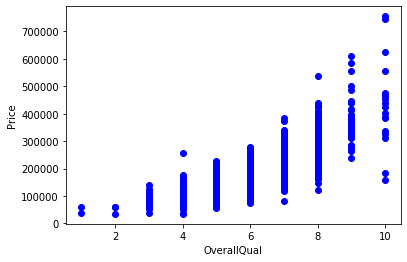

In [104]:
plt.scatter(df.OverallQual, df.SalePrice,  color='blue')
plt.xlabel("OverallQual")
plt.ylabel("Price")
plt.show()

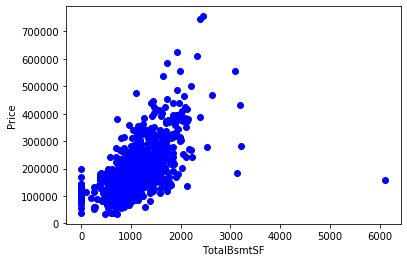

In [105]:
plt.scatter(df.TotalBsmtSF, df.SalePrice,  color='blue')
plt.xlabel("TotalBsmtSF")
plt.ylabel("Price")
plt.show()

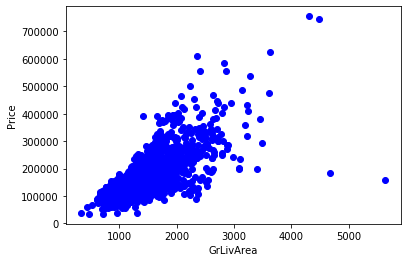

In [106]:
plt.scatter(df.GrLivArea, df.SalePrice,  color='blue')
plt.xlabel("GrLivArea")
plt.ylabel("Price")
plt.show()

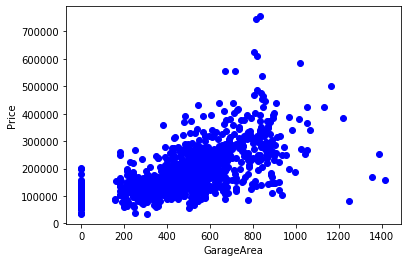

In [107]:
plt.scatter(df.GarageArea, df.SalePrice,  color='blue')
plt.xlabel("GarageArea")
plt.ylabel("Price")
plt.show()

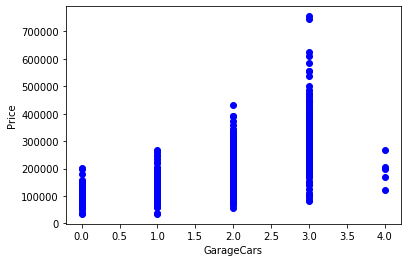

In [108]:
plt.scatter(df.GarageCars, df.SalePrice,  color='blue')
plt.xlabel("GarageCars")
plt.ylabel("Price")
plt.show()

In [109]:
y = df['SalePrice']
x = df[['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars']]

In [110]:
X_train, X_validate, y_train, y_validate = train_test_split(x,y, train_size=0.8, test_size=0.2, shuffle=False)

In [111]:
corr = round(df.corr(),3)
corr.style.background_gradient()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,GarageCars,SalePrice
OverallQual,1.000000,0.538000,0.476000,0.593000,0.562000,0.601000,0.791000
TotalBsmtSF,0.538000,1.000000,0.820000,0.455000,0.487000,0.435000,0.614000
1stFlrSF,0.476000,0.820000,1.000000,0.566000,0.490000,0.439000,0.606000
GrLivArea,0.593000,0.455000,0.566000,1.000000,0.469000,0.467000,0.709000
GarageArea,0.562000,0.487000,0.490000,0.469000,1.000000,0.882000,0.623000
GarageCars,0.601000,0.435000,0.439000,0.467000,0.882000,1.000000,0.640000
SalePrice,0.791000,0.614000,0.606000,0.709000,0.623000,0.640000,1.000000


In [112]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [25305.08688988    46.44854961    55.91843773]
Intercept:  -106725.73074659516


In [113]:
from sklearn.metrics import r2_score

predicciones = regr.predict(X_validate)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predicciones - y_validate)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicciones - y_validate) ** 2))
print("R2-score: %.2f" % r2_score(predicciones , y_validate) )

Mean absolute error: 27933.49
Residual sum of squares (MSE): 2603262433.94
R2-score: 0.56
